<a href="https://colab.research.google.com/github/pkor725/East-Africa-Financial-inclusivity-/blob/master/Moringa_Data_Science_Core_W2_Independent_Project_2019_12_Gideon_k_Cheruiyot_DataReport_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
**Who is more likely to have a bank account?**



In [0]:
#importing libraries
import numpy as np
import pandas as pd

In [0]:
#loading the dataset
fin_df = pd.read_csv(r'C:\Users\Gideon Kipkorir\Downloads/Financial Dataset - 1.csv')

In [0]:
#previewing the dataset, top
fin_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [0]:
#understanding the datatypes in the dataset
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [0]:
# knowing number of rows and columns
fin_df.shape

(23524, 13)

In [0]:
#finding null values
fin_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [0]:
#Replacing 'Don't know' response with null
fin_df.replace(to_replace = 'Dont know', value = np.nan, inplace = True)
fin_df['The relathip with head'].unique()

#Replacing Other/Dont know/RTA' response with null
fin_df.replace(to_replace = 'Other/Dont know/RTA', value = np.nan, inplace = True)

#Replacing 'Dont Know/Refuse to answer' response with null
fin_df.replace(to_replace = 'Dont Know/Refuse to answer', value = np.nan, inplace = True)

#Replacing 'Dont Know/Refuse to answer' response with null
fin_df.replace(to_replace = '6', value = np.nan, inplace = True)


In [0]:
#filling null values for country feature using years

#2016 is for Rwanda
fin_df[fin_df['year'] == 2016]
fin_df['country'].fillna('Rwanda', inplace = True)

#2017 for Tanzania
fin_df[fin_df['year'] == 2017]
fin_df['country'].fillna('Tanzania', inplace = True)

# since 2018 is shared by kenya and Uganda,
#We will backward fill
fin_df['country'].fillna(method = 'bfill', inplace = True)


In [0]:
#dropping null values
fin_df.dropna(inplace = True)
fin_df.shape
fin_df['year'] =fin_df['year'].astype('str')


**Univariate analysis**

In [0]:
#using describe function
fin_df.describe()

,household_size,Respondent Age
count,23189.000000,23189.000000
mean,3.683643,38.791927
std,2.278644,16.513737
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


In [0]:
fin_df.groupby(['country'])['household_size','Respondent Age' ].describe()

household_size                                                \
                  count      mean       std  min  25%  50%  75%   max   
country                                                                 
Kenya            6045.0  3.989082  2.333371  1.0  2.0  4.0  5.0  21.0   
Rwanda           8625.0  4.481159  1.981629  1.0  3.0  4.0  6.0  13.0   
Tanzania         6497.0  1.932123  1.055208  0.0  1.0  2.0  2.0  11.0   
Uganda           2022.0  4.996538  2.893882  1.0  3.0  5.0  7.0  20.0   

         Respondent Age                                                       
                  count       mean        std   min   25%   50%   75%    max  
country                                                                       
Kenya            6045.0  39.606121  17.207031  16.0  26.0  35.0  50.0   95.0  
Rwanda           8625.0  39.239884  16.249057  16.0  27.0  35.0  49.0   99.0  
Tanzania         6497.0  38.466369  16.428299  16.0  26.0  35.0  48.0  100.0  
Uganda           2022.0  35.493076  15.335428  16.0  24.0  31.0  45.0   98.0

**Observation:** The average size of an household is 4 members, while the average age of the respondent was 39 years. The maximum size of an house household is 21 members while the maximum age of the respondents was 100 years. A 16_year old was the youngest respodent.

A lot of categorical data also limits us from undertaking analysis on skewness, kurtosis and standard deviation.


In [0]:
#frequency
h  = pd.DataFrame(fin_df.groupby(['Level of Educuation','Has a Bank account'])['Level of Educuation'].count()).rename({'Level of Eductaion': 'Education level', 'Has a Bank account':'Has a Bank Account', 'Level of Eductaion':'Amount'}, axis = 1)
print(h)
i = pd.DataFrame(fin_df.groupby(['Cell Phone Access'])['Has a Bank account'].count())
print(i)
G = pd.DataFrame(fin_df.groupby(['gender_of_respondent','Has a Bank account'])['Has a Bank account'].count())
print(G)
C = pd.DataFrame(fin_df.groupby(['country', 'Has a Bank account'])['Has a Bank account'].count())
print(C)

                                                    Level of Educuation
Level of Educuation             Has a Bank account                     
No formal education             No                                 4280
                                Yes                                 176
Primary education               No                                11535
                                Yes                                1078
Secondary education             No                                 3205
                                Yes                                 973
Tertiary education              No                                  554
                                Yes                                 588
Vocational/Specialised training No                                  345
                                Yes                                 455
                   Has a Bank account
Cell Phone Access                    
No                               5973
Yes                   

   **Recommendation:** Undertaking a frequency analysis only limits us from addressing the question *who is more likely to have a bank account?* This because because the number of respondents vary from each category to the other, converting them to percentages will yield more objective observations.

In [0]:
#Saving cleaned data to csv formatt
fin_df.to_csv('fin.csv')

In [0]:
f_df = pd.read_csv(r"C:\Users\Gideon Kipkorir\Desktop\colab\fin.csv", index_col=0) 
f= df = f_df.drop(['uniqueid','year'], axis = 1)
f_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
#import label encoder,
#label encoder is necessary to allow as to undertake correlation studies since most of the attributes are categorical data.

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
f_df['gender_of_respondent'] = label_encoder.fit_transform(f_df['gender_of_respondent'])
f_df['The relathip with head'] = label_encoder.fit_transform(f_df['The relathip with head'])
f_df['Level of Educuation'] = label_encoder.fit_transform(f_df['Level of Educuation'])
f_df['marital_status'] = label_encoder.fit_transform(f_df['marital_status'])
f_df['Has a Bank account'] = label_encoder.fit_transform(f_df['Has a Bank account'])
f_df['Type of Location'] = label_encoder.fit_transform(f_df['Type of Location'])
f_df['Cell Phone Access'] = label_encoder.fit_transform(f_df['Cell Phone Access'])
f_df['Type of Job'] = label_encoder.fit_transform(f_df['Type of Job'])
f_df['country'] = label_encoder.fit_transform(f_df['country'])
f_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,0,2018,uniqueid_1,1,0,1,3.0,24.0,0,5,1,2,8
1,0,2018,uniqueid_2,0,0,0,5.0,70.0,0,1,3,0,3
2,0,2018,uniqueid_3,1,1,1,5.0,26.0,1,3,2,4,8
3,0,2018,uniqueid_4,0,0,1,5.0,34.0,0,1,1,1,2
4,0,2018,uniqueid_5,0,1,0,8.0,26.0,1,0,2,1,4


In [0]:
f_df=f_df.drop(['year', 'uniqueid'], axis = 1)

f_df.head()

,country,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,0,1,0,1,3.0,24.0,0,5,1,2,8
1,0,0,0,0,5.0,70.0,0,1,3,0,3
2,0,1,1,1,5.0,26.0,1,3,2,4,8
3,0,0,0,1,5.0,34.0,0,1,1,1,2
4,0,0,1,0,8.0,26.0,1,0,2,1,4


**Multivariate Analysis**

In [0]:
#finding correlations amongst variables 
f_df.corr(method = 'pearson')

,country,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
country,1.000000,-0.160409,0.152833,-0.150199,-0.162315,-0.057650,-0.026463,0.129572,0.047897,-0.071626,0.393739
Has a Bank account,-0.160409,1.000000,0.087235,0.209187,-0.021616,0.019429,0.115970,-0.069574,-0.057336,0.366467,-0.065051
Type of Location,0.152833,0.087235,1.000000,-0.085681,-0.275149,-0.047984,0.013567,0.017139,0.107100,0.128085,0.368837
Cell Phone Access,-0.150199,0.209187,-0.085681,1.000000,0.098865,-0.103639,0.102367,-0.048231,-0.127792,0.244017,-0.146652
household_size,-0.162315,-0.021616,-0.275149,0.098865,1.000000,-0.118386,0.011113,0.086699,-0.182605,-0.012757,-0.179912
Respondent Age,-0.057650,0.019429,-0.047984,-0.103639,-0.118386,1.000000,0.012618,-0.150147,0.232000,-0.308773,-0.105018
gender_of_respondent,-0.026463,0.115970,0.013567,0.102367,0.011113,0.012618,1.000000,-0.472632,-0.124904,0.107787,-0.031838
The relathip with head,0.129572,-0.069574,0.017139,-0.048231,0.086699,-0.150147,-0.472632,1.000000,-0.201581,-0.032983,0.041006
marital_status,0.047897,-0.057336,0.107100,-0.127792,-0.182605,0.232000,-0.124904,-0.201581,1.000000,-0.113714,0.087388
Level of Educuation,-0.071626,0.366467,0.128085,0.244017,-0.012757,-0.308773,0.107787,-0.032983,-0.113714,1.000000,0.029706


From correlation studies interesting insights were obtained:

    1.There is a moderate positive correlation between the likelihood of one having a bank account and level of education    
    2.There is a moderate positive correlation between the likelihood of one having a bank account and cell phone access
    3.There is a weak positive correlation between the likelihood of one having a bank account and gender_of_respondent
    4.There is a weak negative correlation between the likelihood of one having a bank account and country
There were no correlation between having a bank account with; Type of Job,marital_status,The relathip with head,Respondent Age,household_size,Type of Location, hence, no analysis will be carried out on the attributes. 

**Visualization of the above findings(Bivariate analysis)**

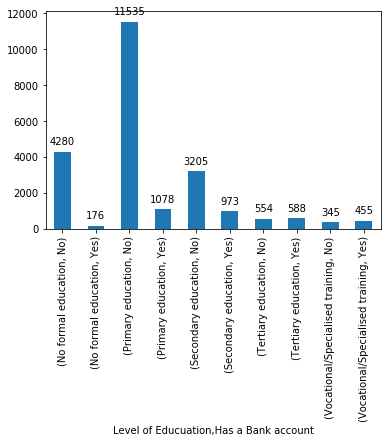

In [0]:
#Visualization of having a bank account and level of education
fi_df = pd.read_csv(r"C:\Users\Gideon Kipkorir\Desktop\colab\fin.csv", index_col=0) 

ax = fi_df.groupby(['Level of Educuation','Has a Bank account'])['Level of Educuation'].count().plot(kind = 'bar')
for p in ax.patches:
  ax.annotate(np.round(p.get_height(),decimals=1), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

From the observation above, the likelihood of  not having a bank account decreases with the advancement of the level of education, There is high variation in primary level of education

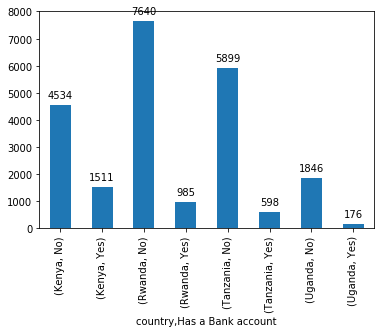

In [0]:
#Relationship between having a bank account and cell phone access

ax = fi_df.groupby(['country', 'Has a Bank account'])['Has a Bank account'].count().plot(kind = 'bar')
for p in ax.patches:
  ax.annotate(np.round(p.get_height(),decimals=1), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

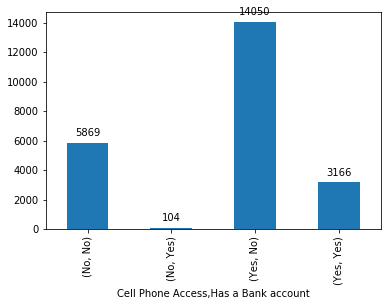

In [0]:
#Relationship between having a bank account and cell phone access

ax = fi_df.groupby(['Cell Phone Access', 'Has a Bank account'])['Has a Bank account'].count().plot(kind = 'bar')
for p in ax.patches:
  ax.annotate(np.round(p.get_height(),decimals=1), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


**Observation:**

Having a cellphone increases  the likelihood of one having a bank account.

**Recommendation:**
To have an objective view of the relationships between attributes that have correlation with Having a bank account, we should test the significance of the the correlating attributes, so that we can dispell the fears that the correlations were by chance.

In [0]:
# f_df = f_df.dropna()
# f_df=f_df.drop(['year', 'uniqueid'])


In [0]:
f_df.head()

,country,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,0,1,0,1,3.0,24.0,0,5,1,2,8
1,0,0,0,0,5.0,70.0,0,1,3,0,3
2,0,1,1,1,5.0,26.0,1,3,2,4,8
3,0,0,0,1,5.0,34.0,0,1,1,1,2
4,0,0,1,0,8.0,26.0,1,0,2,1,4


**Applying Linear Discriminate analysis as a reduction Technique**

LDA(Linear  Discriminate analysis) would be appropriate in this case because we are dealing with a classification problem between who has a bank account and who does not have. 

In [0]:
#dividing the dataset
X = f_df.iloc[:, 2:10].values
y = f_df.iloc[:, 1].values

In [0]:
#dividing data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [0]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
#Peforming LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

C:\Users\Gideon Kipkorir\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(8, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\Gideon Kipkorir\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [0]:
#Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


C:\Users\Gideon Kipkorir\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
#Evaluating the Performance

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[3862  116]
 [ 490  170]]
Accuracy0.869340232858991
